Exploratory data analysis (EDA) is a crucial component of data science which allows you to understand the basics of what your data looks like and what kinds of questions might be answered. For this task, we are going to clean, sanitise and explore our data. Using the automobile dataset, complete the steps outlined in this notebook by writing code in the cells.

In [18]:
# Import libraries

import numpy as np
import pandas as pd
import seaborn as sns

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [19]:
# Load the movies dataset
automobiles_df = pd.read_csv('automobile.txt')

# Display the full dataset information in a scrollable format
pd.set_option('display.max_rows', 210, 'display.max_columns', 30)
automobiles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

### Data Cleansing
#### Clean the data

Identify columns that are redundant or unnecessary. It is always easier to make your decisions based on data which is relevant and concise. Remove the following columns `['normalized-losses', 'symboling']` from the data set as they will not be used in the analysis.

In [20]:
# drop 'symboling' and 'normalized-losses' columns
automobiles_df.drop(['symboling', 'normalized-losses'], axis=1, inplace=True)
automobiles_df

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
5,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250
6,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710
7,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920
8,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875
9,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.00,160,5500,16,22,?


#### Remove any duplicate rows

In [4]:
# Check for duplicates
duplicate_rows = automobiles_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

# Display duplicate rows (if any)
if duplicate_rows > 0:
    print("Duplicate rows:")
    print(automobiles_df[automobiles_df.duplicated()])

# Drop duplicates and update the DataFrame
automobiles_df = automobiles_df.drop_duplicates()

# Verify the new shape
print(f"New number of rows after dropping duplicates: {automobiles_df.shape[0]}")

Number of duplicate rows: 0
New number of rows after dropping duplicates: 205


#### Remove rows with missing data

Some automobiles in the database have missing values which implies that their values have not been recorded or some information is missing. Discard such entries from the dataframe.

In [21]:
# Replace '?' with NaN
automobiles_df = automobiles_df.replace('?', np.nan)

# Check for missing values after replacement
missing_values = automobiles_df.isnull().sum()
print("Missing values per column:")
print(missing_values)

# Drop rows with any missing values
automobiles_df = automobiles_df.dropna()

# Verify the new shape
print(f"New number of rows after dropping missing values: {automobiles_df.shape[0]}")

# Reset index for clean numbering
automobiles_df = automobiles_df.reset_index(drop=True)

Missing values per column:
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 4
stroke               4
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                4
dtype: int64
New number of rows after dropping missing values: 193


Change columns with numerical data column to an integer data type using numpy’s `int64` method.

In [22]:
# Identify numeric columns
numeric_columns = ['wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-size',
 'compression-ratio',
 'city-mpg',
 'highway-mpg',
 'price',
 'bore',
 'stroke',
 'peak-rpm',
 'horsepower']

numeric_columns

['wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-size',
 'compression-ratio',
 'city-mpg',
 'highway-mpg',
 'price',
 'bore',
 'stroke',
 'peak-rpm',
 'horsepower']

In [23]:
# Convert to int64, handling any remaining NaN with coercion
for col in numeric_columns:
    automobiles_df[col] = pd.to_numeric(automobiles_df[col], errors='coerce').astype(np.int64)

# Verifying the data types
print(automobiles_df.dtypes)

make                 object
fuel-type            object
aspiration           object
num-of-doors         object
body-style           object
drive-wheels         object
engine-location      object
wheel-base            int64
length                int64
width                 int64
height                int64
curb-weight           int64
engine-type          object
num-of-cylinders     object
engine-size           int64
fuel-system          object
bore                  int64
stroke                int64
compression-ratio     int64
horsepower            int64
peak-rpm              int64
city-mpg              int64
highway-mpg           int64
price                 int64
dtype: object


### Finding Certain Categories
Locate all automobiles in the "hatchback" genre.

In [24]:
# Dataframe with all the cars in the "hatchback' category
hatchback_cars = automobiles_df[automobiles_df['body-style']== 'hatchback']
hatchback_cars

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
2,alfa-romero,gas,std,two,hatchback,rwd,front,94,171,65,52,2823,ohcv,six,152,mpfi,2,3,9,154,5000,19,26,16500
17,chevrolet,gas,std,two,hatchback,fwd,front,88,141,60,53,1488,l,three,61,2bbl,2,3,9,48,5100,47,53,5151
18,chevrolet,gas,std,two,hatchback,fwd,front,94,155,63,52,1874,ohc,four,90,2bbl,3,3,9,70,5400,38,43,6295
20,dodge,gas,std,two,hatchback,fwd,front,93,157,63,50,1876,ohc,four,90,2bbl,2,3,9,68,5500,37,41,5572
21,dodge,gas,std,two,hatchback,fwd,front,93,157,63,50,1876,ohc,four,90,2bbl,2,3,9,68,5500,31,38,6377
22,dodge,gas,turbo,two,hatchback,fwd,front,93,157,63,50,2128,ohc,four,98,mpfi,3,3,7,102,5500,24,30,7957
23,dodge,gas,std,four,hatchback,fwd,front,93,157,63,50,1967,ohc,four,90,2bbl,2,3,9,68,5500,31,38,6229
27,dodge,gas,turbo,two,hatchback,fwd,front,95,173,66,50,2811,ohc,four,156,mfi,3,3,7,145,5000,19,24,12964
28,honda,gas,std,two,hatchback,fwd,front,86,144,63,50,1713,ohc,four,92,1bbl,2,3,9,58,4800,49,54,6479
29,honda,gas,std,two,hatchback,fwd,front,86,144,63,50,1819,ohc,four,92,1bbl,2,3,9,76,6000,31,38,6855


### Now onto the exploration

#### Identify relationships between variables (features)

The main goal here is to identify and create relationships that can help you formulate ideas. We have defined questions to help you identify some relationships to explore.

#### Which are the 5 most expensive cars?

How do the most expensive and cheapest cars compare? Exploring the most expensive cars highlights if some moviecars are worth the money spent on them based on their fuel economy (mpg or miles per gallon)

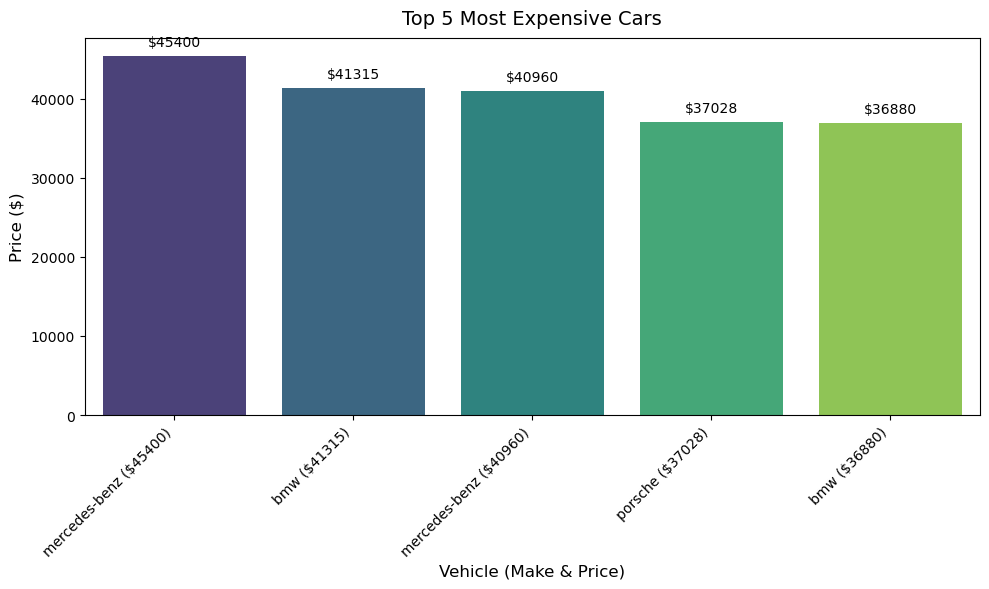

In [25]:
# Get the top 5 most expensive cars
top_5_expensive = automobiles_df.nlargest(5, 'price').copy()

# Add a custom index for distinct bars
top_5_expensive['custom_index'] = range(5)

# Create unique labels combining make and price
top_5_expensive['label'] = top_5_expensive.apply(lambda x: f"{x['make']} (${x['price']})", axis=1)

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=top_5_expensive, x='custom_index', y='price', palette='viridis')
plt.title('Top 5 Most Expensive Cars', fontsize=14, pad=10)
plt.xlabel('Vehicle (Make & Price)', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.xticks(ticks=range(5), 
           labels=top_5_expensive['label'], 
           rotation=45, ha='right')

# Annotate prices on top of bars
for p in ax.patches:
    ax.annotate(f'${int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

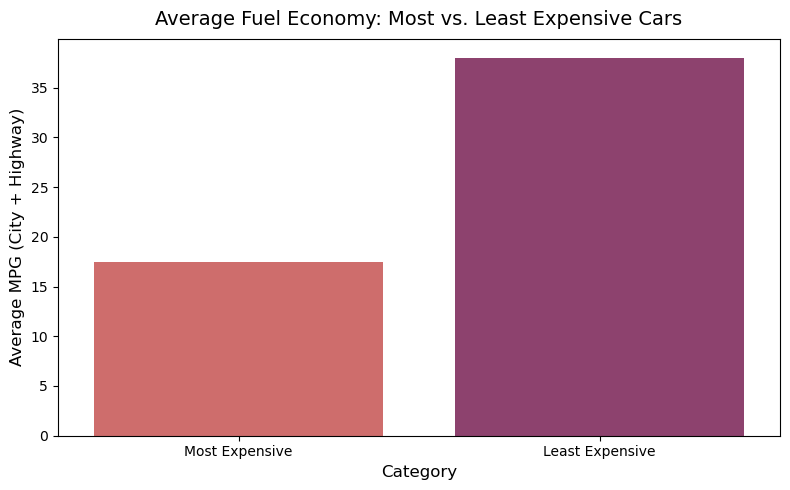

Average Fuel Economy for Top 5 Most Expensive Cars: 17.50 MPG
Average Fuel Economy for 5 Least Expensive Cars: 38.00 MPG


In [26]:
# Get the 5 most and least expensive cars
most_expensive = automobiles_df.nlargest(5, 'price')
least_expensive = automobiles_df.nsmallest(5, 'price')

# Calculate average fuel economy (average of city and highway MPG)
avg_most_mpg = (most_expensive['city-mpg'].mean() + most_expensive['highway-mpg'].mean()) / 2
avg_least_mpg = (least_expensive['city-mpg'].mean() + least_expensive['highway-mpg'].mean()) / 2

# Create a DataFrame for plotting
comparison_df = pd.DataFrame({
    'Category': ['Most Expensive', 'Least Expensive'],
    'Average MPG': [avg_most_mpg, avg_least_mpg]
})

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=comparison_df, x='Category', y='Average MPG', palette= 'flare')
plt.title('Average Fuel Economy: Most vs. Least Expensive Cars', fontsize=14, pad=10)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Average MPG (City + Highway)', fontsize=12)
plt.tight_layout()
plt.show()

# Optional: Print the averages for reference
print("Average Fuel Economy for Top 5 Most Expensive Cars: {:.2f} MPG".format(avg_most_mpg))
print("Average Fuel Economy for 5 Least Expensive Cars: {:.2f} MPG".format(avg_least_mpg))

#### Which manufacturer builds the most fuel efficient vehicles?

Compare the average mpg for each vehicle manufacture's vehicles and create a bar plot

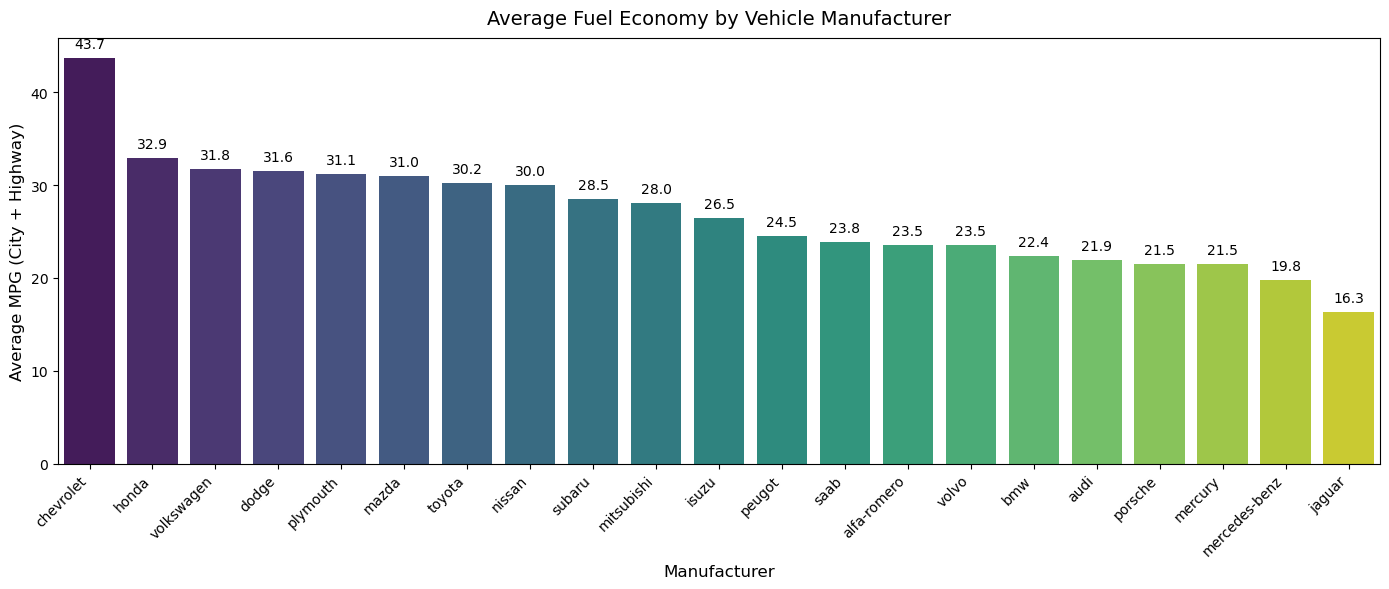

In [27]:
# Calculate average MPG (city + highway) per make
mpg_by_make = automobiles_df.groupby('make')[['city-mpg', 'highway-mpg']].mean().reset_index()
mpg_by_make['avg_mpg'] = (mpg_by_make['city-mpg'] + mpg_by_make['highway-mpg']) / 2

# Sort by average MPG for better visualization
mpg_by_make = mpg_by_make.sort_values('avg_mpg', ascending=False)

# Plot with annotations
plt.figure(figsize=(14, 6))
ax = sns.barplot(data=mpg_by_make, x='make', y='avg_mpg', palette='viridis')
plt.title('Average Fuel Economy by Vehicle Manufacturer', fontsize=14, pad=10)
plt.xlabel('Manufacturer', fontsize=12)
plt.ylabel('Average MPG (City + Highway)', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Annotate MPG values on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.tight_layout()
plt.show()

#### Which vehicles have the largest engine capacity.
Sort the dataframe based on the engine-size column.

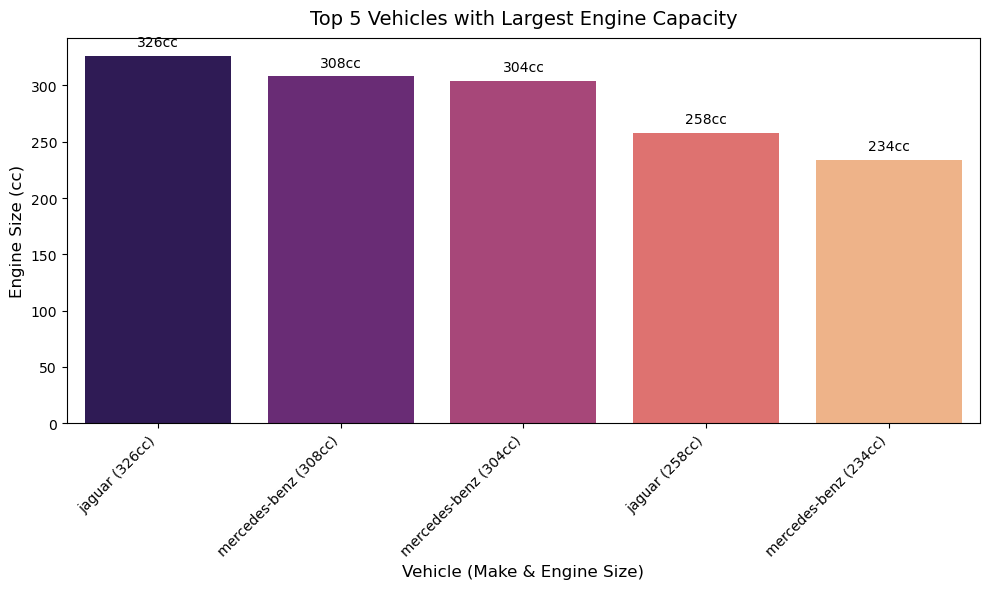

In [28]:
# Group by 'make' and 'engine-size' to get unique combos, taking the first occurrence
grouped_df = automobiles_df.groupby(['make', 'engine-size']).first().reset_index()

# Sort by engine-size in descending order and get top 5
top_engine_size = grouped_df.sort_values(by='engine-size', ascending=False).head(5)

# Create unique labels for the x-axis
top_engine_size['label'] = top_engine_size.apply(lambda x: f"{x['make']} ({x['engine-size']}cc)", axis=1)

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=top_engine_size, x='label', y='engine-size', palette='magma')
plt.title('Top 5 Vehicles with Largest Engine Capacity', fontsize=14, pad=10)
plt.xlabel('Vehicle (Make & Engine Size)', fontsize=12)
plt.ylabel('Engine Size (cc)', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Annotate engine sizes on top of bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}cc', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

#### Which vehicle manufacturer has the most car models in the dataset

Manufacturer with the most models: toyota (32 models)


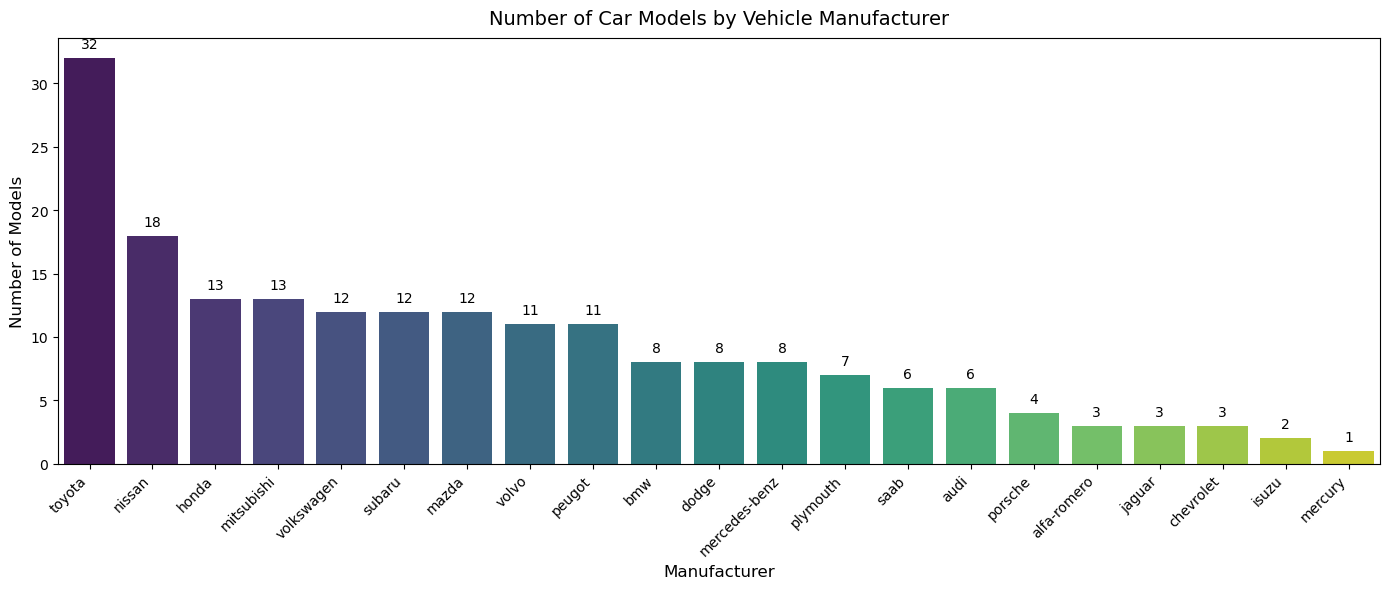

In [29]:
# Count models per manufacturer
models_by_make = automobiles_df['make'].value_counts().reset_index()
models_by_make.columns = ['make', 'model_count']

# Find the manufacturer with the most models
top_manufacturer = models_by_make.iloc[0]
print(f"Manufacturer with the most models: {top_manufacturer['make']} ({top_manufacturer['model_count']} models)")

# Plot
plt.figure(figsize=(14, 6))
ax = sns.barplot(data=models_by_make, x='make', y='model_count', palette='viridis')
plt.title('Number of Car Models by Vehicle Manufacturer', fontsize=14, pad=10)
plt.xlabel('Manufacturer', fontsize=12)
plt.ylabel('Number of Models', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Annotate counts on top of bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.tight_layout()
plt.show()